## 점진적인 학습 이란
##### -훈련에 필요한 데이터가 한번에 다 수집된 경우가 아니라,
##### -시간 차를 두고 수집이 되는 경우에는 훈련모델 학습은 언제 해야 할까?
##### -이런 문제를 해결하기 위해 수집될 때 마다 학습을 계속 이어나가는 훈련방식을
##### -'점진적인 학습' 이라고 합니다.
##### --->'점진적인 학습'또는 온라인 학습이라고 칭함
##### - 대표적인 점진적 학습 알고리즘은 "확률적 경사하강법"입니다.

## 확률적 경사 하강법(SGD; Stochastic Gradient Descent)
##### -경사 란 : 우리가 사용하는 단어만 경사(기울기) 입니다.
##### -하강법 이란 : 내려가는 방법 입니다.
##### -경사 하강법 이란?
##### -...: 원하는 지점에 도달하기 위해 가장 가파른 경사를 따라 내려가는 방법을 찾는 방법
##### -확률적 이란 : "무작위하게"또는 "랜덤하게"의 기술적 표현 언어 입니다.
##### :훈련데이터의 전체 특성들 중에서 하나씩 랜덤하게 선택하여 가장 가파른 길을 찾음
## <확률적 경사 하강법>

In [1]:
import pandas as pd
import numpy as np

In [2]:
fish = pd.read_csv('./data/07_fish.csv',encoding='utf-8-sig')
wine = pd.read_csv('./data/08_wine.csv',encoding='utf-8-sig')

In [3]:
# 결측치확인
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


## 2.데이터 전처리

In [4]:
### 독립변수와 종속변수 분리하여 변수화
# 독립변수명 : fish_input
# 종속변수명 : fish_target

## 분리시켜 주세요...

In [5]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(fish_input.shape)
fish_target = fish['Species'].to_numpy()
print(fish_target.shape)

(159, 5)
(159,)


In [6]:
### 훈련(입력, 타겟), 테스트(입력, 타겟) 데이터 분류하기
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(fish_input,fish_target,test_size=0.25,random_state=42)

#현업에서는 시드 잘 안씀
print('훈련-입력', train_input.shape)
print('훈련-타겟', train_target.shape)
print('테스트-입력', test_input.shape)
print('테스트-타겟', test_target.shape)

훈련-입력 (119, 5)
훈련-타겟 (119,)
테스트-입력 (40, 5)
테스트-타겟 (40,)


In [7]:
### 정규화(표준화) -> 독립변수 표준점수로 동일하게 표준화(스케일)

from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성하기
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 확률적 경사 하강법을 이용한 분류

In [8]:
### 사용 클래스(모델) : SGDClassifier

from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
sc = SGDClassifier(loss = 'log', max_iter = 30, random_state=42)

# 훈련 모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print('훈련=', sc.score(train_scaled, train_target))
print('테스트=', sc.score(test_scaled,test_target))


### (해석)
# - 훈련모델의 학습능력이 다소 떨어집니다.
# - 이는 

훈련= 0.8403361344537815
테스트= 0.8


C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [9]:
### 객체(모델) 생성하기
# - loss : 손실함수 (log=로지스틱 손실함수 사용)
#     : 조금씩 내려오면서 손실이 작은쪽을 찾아서 내려오기 위한 방법
#     : 사람은 손실이 작은 값들을 알 수 없습니다.
#     : (학습모델이 가지고 있는 손실 계산식을 통해 결정합니다.)
#     : 분류 결과에 만족한다면, 다 내려왔다고 인정해야 함
#     : (범주가 2개인 이진분류시에 log를 사용합니다) --- xxx삭제
#     : 사람이 직접 만들거나 직접 계산하지는 않음(관여하지 않음)
#     : 훈련모델이 직접 수행
#     : 사람은 분류 성격에 맞게 사용할 손실함수를 지정만 합니다.
# -max_iter : 훈련 반복 횟수
#     : (전체 특성이 다 끝나면 1회로 본다 -> 이를 '에포크'라 함)
#     : 훈련 반복 회수가 부족한 경우 다 내려오기 전에 끝...?
#     : 분류 정확도가 낮아질수도(과소적합), 높아질수도(과대적합)
#     : 가장 적합한 반복 시점(에포크)을 찾아야 함
#     (에포크는 사람이 찾아서 max_iter에 넣어 줄 수 있음)

In [23]:
### 점진적 학습 시작
# 새로운 데이터가 들어왔다고 가정... (실제로는 새로운 데이터 사용)
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9411764705882353
0.925


C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


## 에포크 반복횟수 찾기

In [11]:
import numpy as np
sc = SGDClassifier(loss = 'log', random_state = 42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes = classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))                       

C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
 

In [12]:
print('훈련 정확도 리스트 갯수 = ', len(train_score))
print('테스트 정확도 리스트 갯수 = ', len(test_score))

훈련 정확도 리스트 갯수 =  300
테스트 정확도 리스트 갯수 =  300


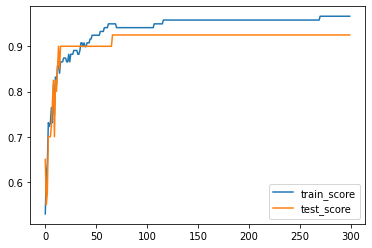

In [13]:
### 최적의 에포크 위치확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

## 가장 가까우면서, test가 유지되면서, train이 변화하는 시작점

In [14]:
### 최적의 에포크값을 이용해서 처음부터 훈련 생성
### 사용 클래스(모델) : SGDClassifier

from sklearn.linear_model import SGDClassifier

# 클래스(모델)생성
# tol=None 훈련이 끝나더라도 스스로 판단하지말고 지정한 값만큼 무조건 돌아라
sc = SGDClassifier(loss = 'log', max_iter = 100, tol=None, random_state=42)

# 훈련 모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련모델 분류 정확도 확인하기
# - 과적합 여부 확인을 위해 훈련 및 테스트 데이터 모두확인
print('훈련=', sc.score(train_scaled, train_target))
print('테스트=', sc.score(test_scaled,test_target))


### (해석)
# - 훈련모델의 학습능력이 다소 떨어집니다.
# - 이는 

훈련= 0.957983193277311
테스트= 0.925


C:\Users\admin\anaconda3\envs\django\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


## 궁금한거 과대적합 판단 기준

## 모델 예측값 데이터프레임에 저장하기

In [15]:
##### (문제)
##### - 새로운 데이터가 수집되었다고 가정하고 예측을 통해 결과값 저장하기
# - 기존 fish 데이터 전체를 신규데이터라고 가정하고 진행
# - 신규  데이터는 Weight, Length, Diagonal, Height, Width
# (데이터프레임 변수는 별도로 만들어서 사용)

##### - 데이터 프레임에 예측결과에 대한 Species_pred 칼럼 추가

##### <출력 결과>
# - Species_pred가 추가된 데이터프레임 출력
#   (출력결과) 데이터프레임의 7개 컬럼 모두 출력
# Weight, Length, Diagonal, Height, Width, Species, Species_pred

# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 개수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률(93.71%), 오답률(6.29%)

In [16]:
fish = pd.read_csv('./data/07_fish.csv',encoding='utf-8-sig')

In [17]:
fish_x = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [18]:
ss.fit(fish_x)
fish_scaled = ss.transform(fish_x)

In [19]:
pred = sc.predict(fish_scaled)
pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Perch', 'Perch',
       'Roach', 'Perch', 'Perch', 'Perch', 'Perch', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Bream', 'Smelt', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Pe

In [20]:
fish['Species_pred'] = pred
fish

,Species,Weight,Length,Diagonal,Height,Width,Species_pred
0,Bream,242.0,25.4,30.0,11.5200,4.0200,Bream
1,Bream,290.0,26.3,31.2,12.4800,4.3056,Bream
2,Bream,340.0,26.5,31.1,12.3778,4.6961,Bream
3,Bream,363.0,29.0,33.5,12.7300,4.4555,Bream
4,Bream,430.0,29.0,34.0,12.4440,5.1340,Bream
...,...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936,Smelt
155,Smelt,13.4,12.4,13.5,2.4300,1.2690,Smelt
156,Smelt,12.2,13.0,13.8,2.2770,1.2558,Smelt
157,Smelt,19.7,14.3,15.2,2.8728,2.0672,Perch


In [21]:
ok = sum(fish['Species'] == fish['Species_pred'])
nok = sum(fish['Species'] != fish['Species_pred'])

In [22]:
# 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 개수[159]건 중에, 정답갯수[149]건, 오답 갯수[10]건
print('총 개수[',len(fish),']건 중에, 정답갯수[',ok,']건, 오답 갯수[',nok,']건')

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률(93.71%), 오답률(6.29%)
print('총(',len(fish)/len(fish)*100,'%)건 중에, 정답률(',round(ok/len(fish)*100,2),'%), 오답률(',round(nok/len(fish),2),'%)')

총 개수[ 159 ]건 중에, 정답갯수[ 149 ]건, 오답 갯수[ 10 ]건
총( 100.0 %)건 중에, 정답률( 93.71 %), 오답률( 0.06 %)
